# Project: Investigate a TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including 
user ratings, revenue and Certain columns, like ‘cast’ and ‘genres’.

Question that I can analyze from this dataset:
- Q1 What are the highest genres over time?
- Q2 What are the most voted genres ?
- Q3 What kinds of properties are associated with movies that have high revenues?
- Q4 How the voting change over years ? 
- Q5 How has movie production change over the years?
- Q6 What are the most films in budget?
- Q7 What are the most films in revenue?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# load full dataframe and take hint about it
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# display datatypes for columns and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# count each number of each datatype for dataframe columns
df.dtypes.value_counts()

object     11
int64       6
float64     4
dtype: int64

In [5]:
# display summary statistics for numerical columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# check null values for dataframe columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64



### Data Cleaning

In [7]:
# after inspecting dataset well, we decided to drop some columns which will not use in analysis
# drop some columns from dataframe and create new dataframe 
columns_drop = ['imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview','release_date']

df = df.apply(lambda x:x.drop(columns_drop),axis=1)

columns_drop :
- imdb_id : I will use id column, so I don't need this column
- budget, revenue : Also I will use budget_adj and revenue_adj which are more accurate
- cast, homepage, tagline, keywords , overview : These variables are unique to each film 
- release_date : I will use release_year column

In [8]:
# display the new dataframe and inspect it 
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# check for duplicated values in dataframe
df.duplicated().sum()

1

In [10]:
# drop duplicated value which found in dataframe
df.drop_duplicates(inplace=True)

In [11]:
# check null values in dataframe 
df.isnull().sum()

id                         0
popularity                 0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# drop all null values in all columns and check the dimensions of dataframe after dropping
df.dropna(inplace=True)
df.shape

(9806, 12)

In [13]:
# check again if there are null values after dropping, but it's clear now, we can start new work 
df.isnull().sum().sum()

0

In [14]:
# split the elements of genres column containing multiple values 
df['genres']=df['genres'].str.split("|",expand=True)
df['genres'].value_counts()

Drama              2225
Comedy             2084
Action             1479
Horror              853
Adventure           551
Thriller            474
Animation           362
Crime               361
Documentary         278
Fantasy             254
Science Fiction     196
Romance             161
Family              128
Mystery             118
Music                79
TV Movie             59
War                  57
Western              42
History              39
Foreign               6
Name: genres, dtype: int64

In [15]:
# display dataset again after cleaning it from unnecessary columns, null values and duplicated values
df.head(2)

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


Cleaning:

Inspecting for issues in data, I found duplicated values and null values.

I chose to drop all duplicated and drop also null values in numerical and categorical columns.

<a id='eda'></a>
## Exploratory Data Analysis



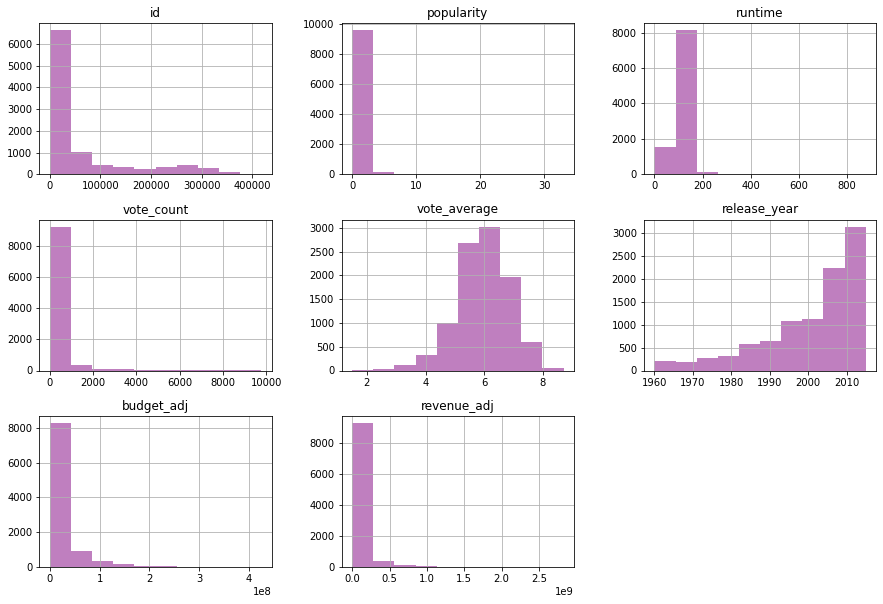

In [16]:
# plot histogram for numerical columns in dataset 
df.hist(figsize=[15,10],color='purple',alpha=0.5)
plt.show()

- release_year shows that the number of produced films are increase.
- vote_average near to normal distribution, most of values around 6.
- budget_adj most of films have the same range in badget.
- revenue_adj most of films have the same range in revenue

### Q1 What are the highest genres over time?

Drama        2225
Comedy       2084
Action       1479
Horror        853
Adventure     551
Name: genres, dtype: int64


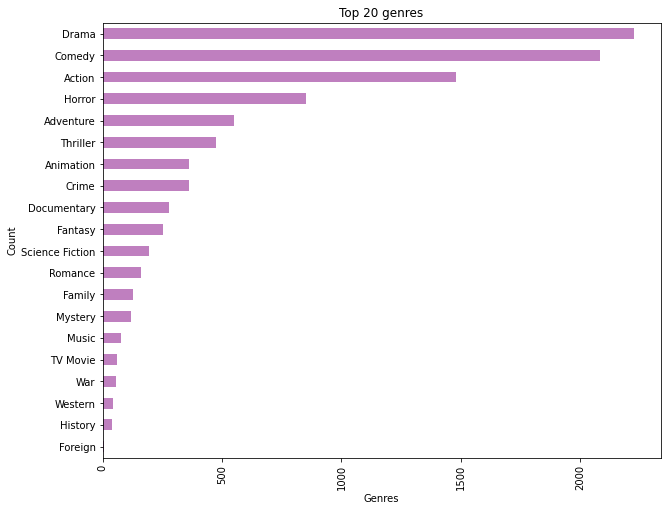

In [37]:
# plot the number of occurence for genres
print(df.genres.value_counts().head())
df.genres.value_counts().sort_values(ascending=True).head(20).plot(kind='barh',figsize=[10,8],color='purple',alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 20 genres')
plt.show()

Drama, Comedy ad Action are the highest genres in dataset. 

## Q2 What are the most voted genres ?

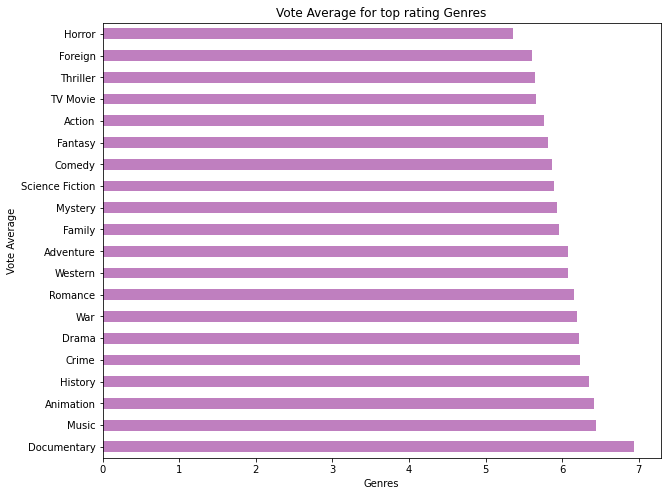

In [18]:
# plot the top voting average of genres
df.groupby('genres')['vote_average'].mean().sort_values(ascending=False).head(20).plot(kind='barh',figsize=[10,8],color='purple',alpha=0.5)
plt.xlabel('Genres')
plt.ylabel('Vote Average')
plt.title('Vote Average for top rating Genres')
plt.show()

Documentary is the most popular genre, following by Music, Animation and History.

## Q3 What kinds of properties are associated with movies that have high revenues?

In [19]:
def myScatterplot(var,title):
    df.plot(x='vote_average',y=var,kind='scatter',figsize=[8,6],color='purple',alpha=0.5)
    plt.title(title)
    plt.show()

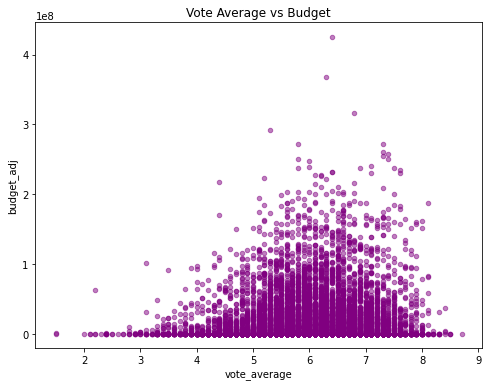

In [20]:
# plot the relation between vote average and budget
myScatterplot('budget_adj','Vote Average vs Budget')

It seems like a positive correlation between budget and vote average, which mean movvies that are highly rated tend to have more budget.

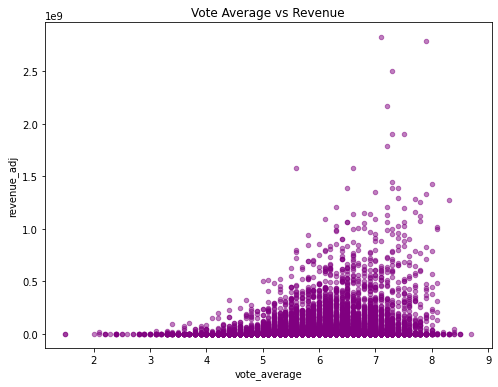

In [21]:
# plot the relation between vote average and revenue
myScatterplot('revenue_adj','Vote Average vs Revenue')

It seems like a positive correlation between revenue and vote average, which mean movvies that are highly rated tend to have more revenue

## Q4 How the voting change over years ?

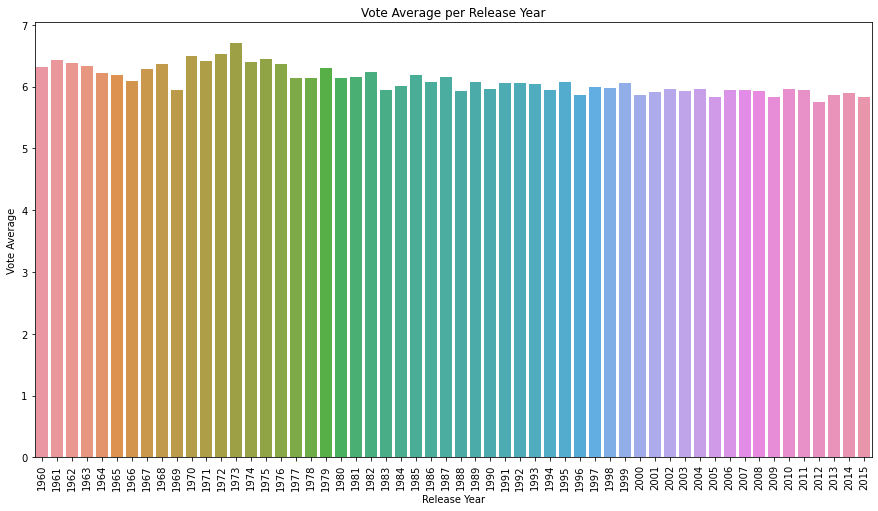

In [28]:
# plot vote average during each year in dataset
ax,fig = plt.subplots(figsize=[15,8])
df_year = df.groupby('release_year').mean()
sns.barplot(x=df_year.index,y=df_year['vote_average'])
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.xticks(rotation=90)
plt.title('Vote Average per Release Year')
plt.show()

Voting average seems to go down than before

## Q5 How has movie production change over the years?

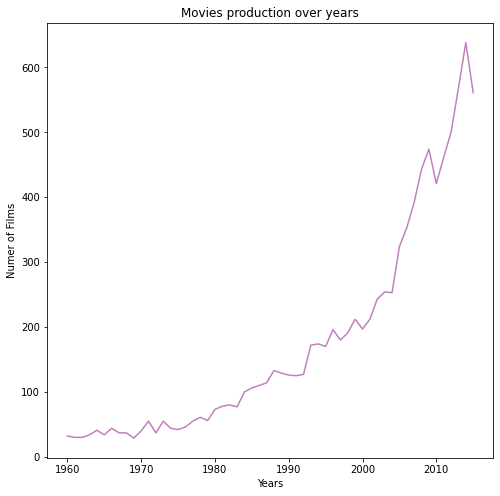

In [23]:
# plot the change in number of films which produced each year
movies_per_year = df['release_year'].value_counts().sort_index()
movies_per_year.plot(color='purple',alpha=0.5,figsize=[8,8])
plt.xlabel('Years')
plt.ylabel('Numer of Films')
plt.title('Movies production over years')
plt.show()

Film industry became very huge and increase year after year.

## Q6 What are the most films in budget?

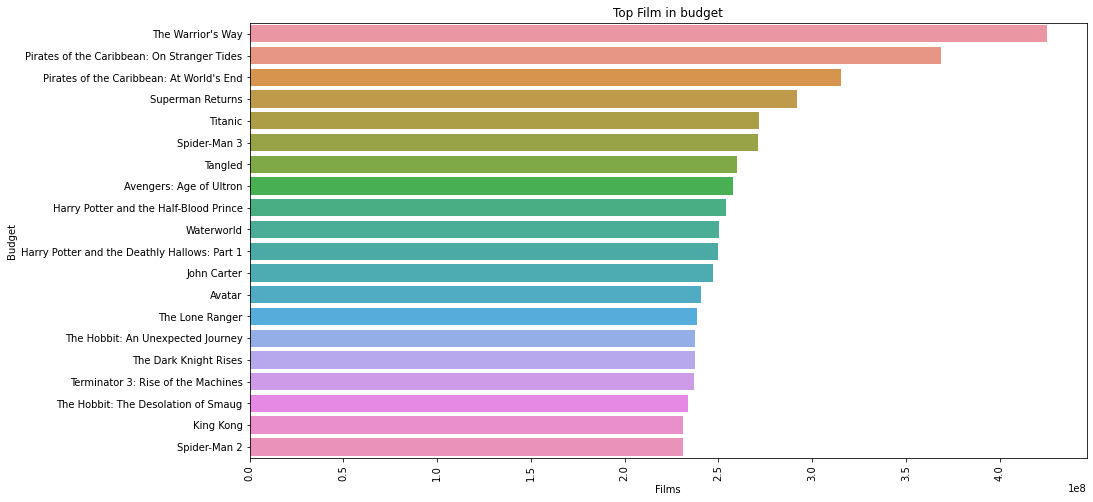

In [24]:
ax,fig = plt.subplots(figsize=[15,8])
df_budget = df[['original_title','budget_adj']]
sns.barplot(data = df_budget.sort_values(by='budget_adj',ascending=False)[:20] , y='original_title',x='budget_adj')
plt.title('Top Film in budget')
plt.xlabel('Films')
plt.ylabel('Budget')
plt.xticks(rotation=90)
plt.show()

The Warrior's Way, Pirates of the Caribbean: On Stranger Tides and Pirates of the Caribbean: At World's End are the highest budget.

## Q7 What are the most films in revenue?

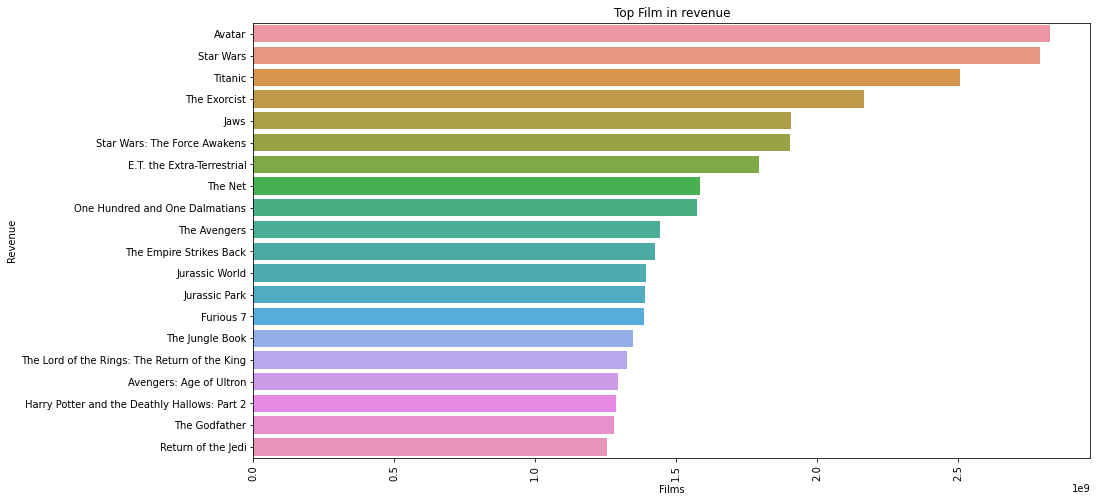

In [25]:
ax,fig = plt.subplots(figsize=[15,8])
df_revenue = df[['original_title','revenue_adj']]
sns.barplot(data = df_revenue.sort_values(by='revenue_adj',ascending=False)[:20] , y='original_title',x='revenue_adj')
plt.title('Top Film in revenue')
plt.xlabel('Films')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

Avatar, Star Wars and Titanic are the highest revenue.

## Udacity Review

In [54]:
# sort the data according to the sample number , selecting the top 5
df_1 = df.groupby(['genres'])[['id']].count().sort_values(by='id',ascending=False)[0:5]
df_new = df[df['genres'].isin(df_1.index.values.tolist())]
# remove budget = 0
df_new1 = df_new[df_new['budget_adj'] >0]
df_new1.head(2)

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


Text(0, 0.5, 'Multiple')

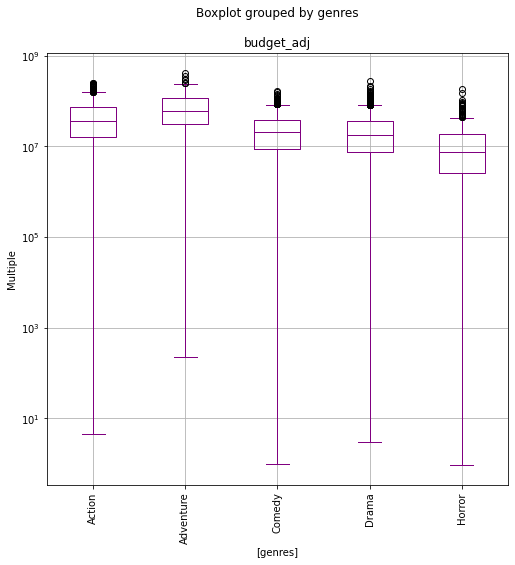

In [61]:
df_new1.boxplot(column=['budget_adj'],by=['genres'],rot=90,figsize=[8,8],color='purple').set_yscale('log')
plt.ylabel('Multiple')

In [60]:
pd.DataFrame(df_new1.groupby(['genres'])['budget_adj'].describe().loc[:,['mean','std']])

,mean,std
genres,,
Action,5.197873e+07,4.857957e+07
Adventure,7.852904e+07,6.483883e+07
Comedy,2.846903e+07,2.612865e+07
Drama,2.767085e+07,2.971039e+07
Horror,1.471073e+07,2.022896e+07


<a id='conclusions'></a>
## Conclusions

In this project, I started with importing important libraries that I will use like Pandas, Numpy, MAtplotlib and Seaborn. I used pandas to import dataset which was in csv file.

After displaying data and check datatypes,shape,missing values, duplicated values and unnecessary elements.
I decided to drop some columns that I won't use them, and drop all missing values and also duplicated values.
I split genres column and make each genre in column.
finally Data is clean now.

New stage, Exploratory Data.
It started by making histograms for numerical columns, see distribution for each one.

At charts I decided to make the dependent cariable is 'vote_average' and see the effect of some columns on it.
I showed the number od films at each genres and see that Drama, Comedy ad Action are the highest genres in dataset.

Vote average as dependent variable and genres as independent variable from that we could see that the Documentary is the most popular genre, following by Music, Animation and History.

I started to see the effect of vote average on badget and revenue and I found that films with high vote average tend to have high badget and revenue too, It was a positive correlation.

I plotted the change of making films over time and see that it increase quickly.
I plotted the highest films in budget and revenue.

## Limitations

In inspecting data I found lots of missing data, 1000 rows and also some unnecessary columns.
I drop these columns and rows maybe this can loss some information from data.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0